# Analysis of Google Trend Data for High-Profile Police Shootings
By Alec Nipp

## Abstract
After the death of George Floyd in May 2020, the harrowing video of his struggle with the police spread like wildfire on social media. Floyd's death joins a long list of convtroversial police incidents that have fomented racial unrest over the past decade. Racial justice movements such as Black Lives Matter often experience spikes in online activity in the aftermath of such controversies (Anderson et al.). Using Google search data obtained from the PyTrends API, this project assesses how public awareness of these police incidents waxes and wanes over time. Analysis indicates that the public awareness of a controversy is greatest when the news is first broken. When the case is ultimately settled in court months later, the Google search activity is, on average, 52% of the original peak. In other words, while the public awareness of a police shooting is generally high at the beginning, the legal resolution of the case draws far less attention. 
## Introduction
Over the last decade, dozens of police shootings have made headlines. Oftentimes, these controversies provoke outrage and prompt social activist movements in response. Social media propagates the news of a controversial shooting and allows the public response to occur in real-time. Many shootings are caught on video. Graphical documentation of the incidents can spread quickly on the Internet and national news. However, public awareness of the controversy tends to drop off sharply after a few weeks. Usage of #BlackLivesMatter tag on Twitter has fluctuated wildly over the past decade (Anderson et al). Activist media spikes dramatically in response to a major police incident, but can just as quickly recede to baseline levels in the following weeks.

The short attention span of the general public can harm the long-term efforts of police-reform activists. While most police incidents receive widespread condemnation, a majority of cops are never tried and convicted for use of deadly force (Lopez). A large portion of police officers involved in high-profile shootings end up avoiding penal sentences. Legal exoneration of the police is a potential rallying point for advocates of justice and police system reform. Yet, it remains unclear whether the general public is fully aware of how police shootings play out in court. 
## Objective
The goal of this investigation is to track public awareness of high-profile police incidents in the months and years following the initial public outcry. Specifically, I wanted to compare the public awareness at two critical time periods: the initial backlash and the resolution in court. Previous studies have used data from Google searches and Twitter hashtags a metric for the public awareness of particular social justice phenomena (Giorgio et al., Anderson et al., Good Morning). This project aims to quanitfy how the Google searches for a police incident fluctuate over time, with a special emphasis on the public response to the legal process.
## Methods
Using major news sources, fifteen high-profile and highly-publicized police incidents were identified. These were typically infamous shootings of unarmed blacks (e.g. shooting of Tamir Rice), but incidents that did not involve firearms (e.g. death of Eric Garner) were included as well. For each incident, the victim name, date of death, and date of legal resolution were all collected and placed in a table. A legal resolution was either a court decision, grand jury ruling, or other official statement that ended the legal proceedings surrounding the officers involved in the incidents.

This data was loaded into a Pandas dataframe and processed using the tools available in that package. For each case in the dataset, Google search data was fetched using PyTrends API. PyTrends returns a time-index table of the relative search frequency for the key-word, which was the name of the victim in this case. The ratio of original search frequency to the search frequency at the legal resolution was computed and placed in a table.

The methods described above were appreciably effective tools in the analysis. However, this methodology has some limitations. The fifteen cases examined in the study were handpicked. Not only was this inefficient, but a larger data set would yield more reliable results and conclusions. Furthermore, the trends data itself didn't always behave as expected. The name "William Chapman", for instance, appeared to have far more peaks than the rest of the cases. This could be the result of noise, as some of the searches may have been targeting a different William Chapman. While the court date peak was often visible in the data, it was sometimes less apparent. Specifically in the case of Freddie Gray, the traffic during the week of legal resolution was zero.

In [12]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

import pandas as pd
import numpy as np
import pytrends
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Establish connection to API
pytrends = TrendReq(hl='en-US', tz=360)

# Keywords
kw_list = ["George Floyd"]

# Get information about the list of keywords from between today and 1 year ago
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')
df = pytrends.interest_over_time()
print(df)


            George Floyd isPartial
date                              
2020-04-19             0     False
2020-04-26             0     False
2020-05-03             0     False
2020-05-10             0     False
2020-05-17             0     False
2020-05-24            74     False
2020-05-31           100     False
2020-06-07            33     False
2020-06-14             8     False
2020-06-21             5     False
2020-06-28             3     False
2020-07-05             2     False
2020-07-12             2     False
2020-07-19             2     False
2020-07-26             2     False
2020-08-02             3     False
2020-08-09             2     False
2020-08-16             2     False
2020-08-23             2     False
2020-08-30             1     False
2020-09-06             1     False
2020-09-13             1     False
2020-09-20             1     False
2020-09-27             1     False
2020-10-04             1     False
2020-10-11             1     False
2020-10-18          

**Table 1.** Above is an example of the time-indexed table returned by a PyTrends query. The week of data collection is shown in the "date" column; the relative search frequency is shown in the column labeled by the search term, "George Floyd"; the last column labeled "isPartial" wasn't needed for this investigation.

In [4]:

# Import names and dates from csv file

cases = pd.read_csv("shootings.csv")
print(cases)
cases["np_date_start"] = [np.datetime64(case) for case in cases["date-start"]]
cases["np_court_date"] = [np.datetime64(case) for case in cases["court-date"]]

                  name  date-start  court-date
0         Freddie Gray  2015-01-12  2017-07-27
1           Sam Dubose  2015-01-19  2017-06-23
2     Philando Castile  2016-01-06  2017-06-16
3     Terence Crutcher  2016-01-16  2017-05-17
4       Alton Sterling  2016-01-05  2018-03-27
5          Jamar Clark  2015-01-15  2016-03-30
6        Jeremy McDole  2015-01-23  2016-05-19
7   William Chapman II  2015-01-22  2016-08-04
8         Walter Scott  2015-01-04  2016-12-07
9          Eric Harris  2015-01-02  2017-10-19
10          Tamir Rice  2014-01-22  2015-12-28
11         Akai Gurley  2014-01-20  2016-02-11
12       Michael Brown  2014-01-09  2014-11-24
13         Eric Garner  2014-01-17  2014-12-04
14      Breonna Taylor  2020-01-13  2020-09-23


**Table 2.** The police incidents examined in this investigation. The "date-start" column is the date where the script begins to track the search data. Start dates were arbitrarily chosen but had to occur before the date of the incident. The "court-date" column contains the date of the legal resolution.

In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
def largest_from_list(lst, num):
    """
    Finds the num largest entries in lst
    """
    lst.sort()
    start = len(lst) - (num)
    return lst[start:]

def closest_date(datelist, target):
    """
    Returns the date that is closest to (but after) the target
    """
    for i in range(len(datelist)):
        if datelist[i] > target:
            return datelist[i-1]
    return False

def date_as_string(date):
    return str(date)[:10]

def sorted_by_size(tuples):
    """
    Sorts the list based on second list
    """
    new = sorted(tuples, key=lambda x: x[1], reverse=True)
    return new

class ShootingCase:
    def __init__(self, name, date_start):
        #Initializes the object
        self.name = name
        self.data = self.retrieve_data(date_start + " 2021-04-12")
        self.make_graph()
    def retrieve_data(self, time):
        """
        Retrieves the Google search data starting from time
        """
        pytrends.build_payload([self.name], cat=0, timeframe = time, geo='', gprop='')
        df = pytrends.interest_over_time()
        return df
    
    def make_graph(self):
        """"
        Makes a MatPlotLib graph using the trends data
        """
        #image = self.data.plot(title = f"Interest in {self.name} on Google Trends")
        #plt.annotate("Court peak", (self.get_court_peak(), self.get_court_peak_size()))
        plt.plot(self.data.index, self.data[self.name])
        plt.title(f"Interest in {self.name} on Google Trends")
        plt.xlabel("Date")
        plt.ylabel("Interest")
        plt.plot(self.get_filtered_peaks()[0][0], self.get_filtered_peaks()[0][1], 'o', color="red", markersize=5)
        plt.plot(self.get_court_date_week(), self.get_court_peak_size(), 'o', color="purple", markersize=5) # mark the court date
        plt.show()
    
    def save_graph(self):
        """
        Saves graph as png
        """
        #self.graph.savefig(f"trends-{self.name}.png")
        pass
        
    def get_rows_above(self, threshold):
        """
        A method for getting a list of the dates where traffic is greater than threshold
        """
        above = self.data[self.data[self.name] > threshold]
        return above
    
    def get_peaks(self):
        """
        Returns a list of all maximums (where a point is greater than the points to its left and right)
        """
        rows = self.get_date_traffic_pairs()
        peaks = [] # tracks the peaks
        for i in range(len(rows)-1):
            if rows[i][1] > rows[i-1][1]:
                if rows[i][1] > rows[i+1][1]:
                    peaks.append(rows[i])
        return peaks
    def get_filtered_peaks(self, num=5):
        """
        Returns the top 5 (by default) peaks in the data
        """
        peaks = self.get_peaks()
        traffic = [traffic for date,traffic in peaks]
        highest = largest_from_list(traffic, num)
        filtered = []
        for entry in peaks:
            if entry[1] in highest:
                filtered.append(entry)
        return sorted(filtered)
    
    def get_date_traffic_pairs(self):
        """
        Returns a list of tuples where the date is paired with the traffic 
        """
        zipped = zip(self.get_dates(), self.data[self.name])
        return list(zipped)
    
    def get_dates(self):
        """
        Returns a list of all dates contained in the dataset (indices of the dataframe)
        """
        return list(self.data.index.values)
    
    def get_rownum(self, dataset):
        """
        Returns the row number of this name/entry in the dataset
        """
        rownum = dataset[dataset['name'] == self.name].index[0]
        return rownum
    
    def get_court_peak(self):
        """
        Gets the closest peak to the court date
        """
        return self.get_court_date_week()
    
    def get_court_peak_size(self):
        """
        Returns the magnitude of the peak closest to the court date
        """
        return self.data[self.name][date_as_string(self.get_court_date_week())]
    
    def get_court_date(self):
        """
        Gets the exact court date from the dataset
        """
        rownum = self.get_rownum(cases)
        court_date = cases["np_court_date"][rownum]
        return court_date
    
    def get_court_date_week(self):
        """
        Gets the closest date in the dataset to the exact court date
        """
        date = self.get_court_date()
        return closest_date(self.get_dates(), date)
    
    
#case_test = ShootingCase("Jeremy McDole", "2015-01-01")
# print(sorted_by_size(case_test.get_filtered_peaks()))
# print(case_test.get_court_peak())

## Results
Below are the results of the analysis. 

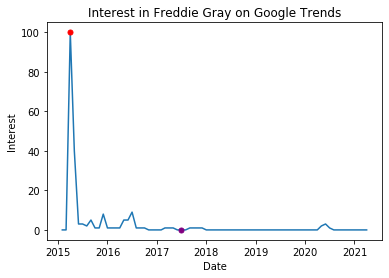

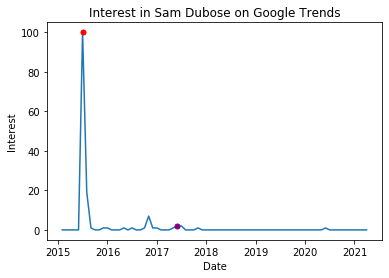

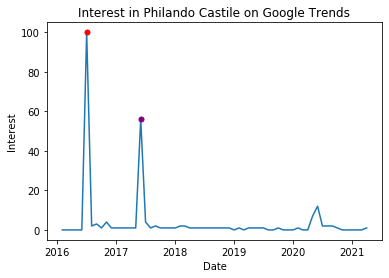

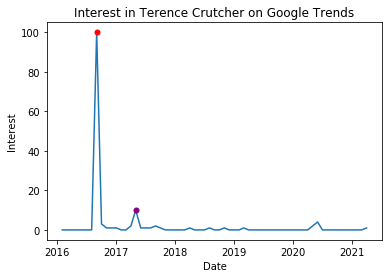

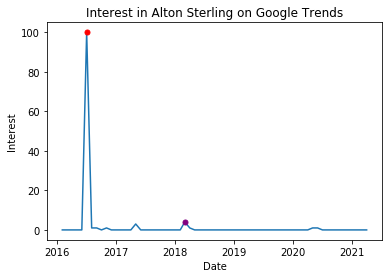

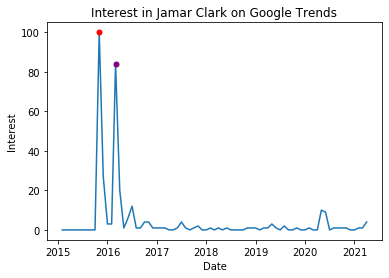

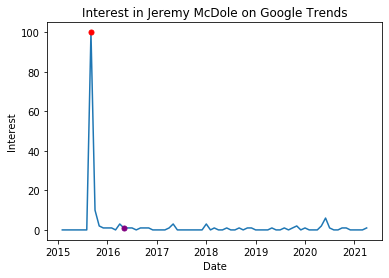

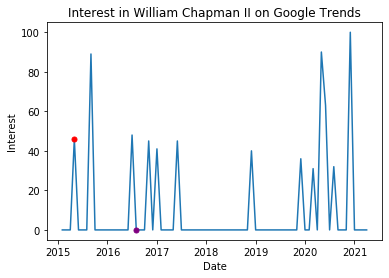

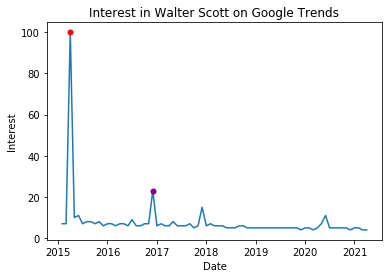

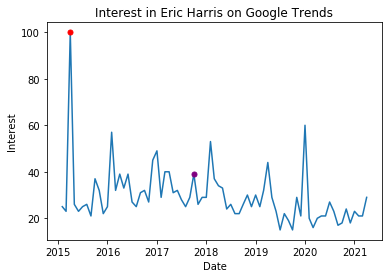

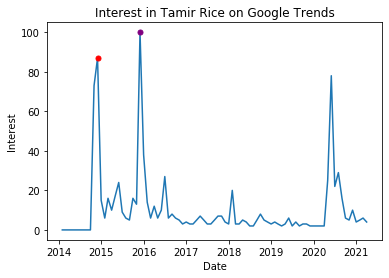

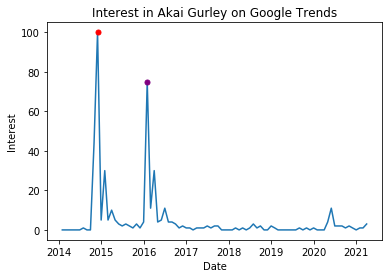

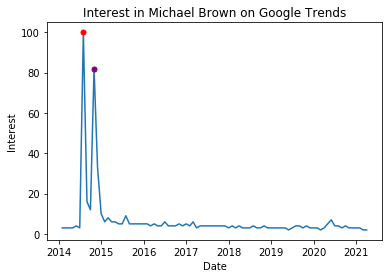

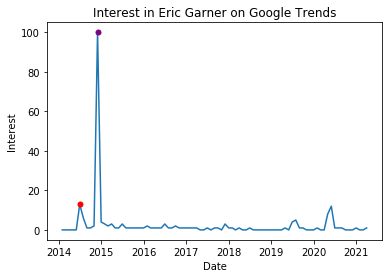

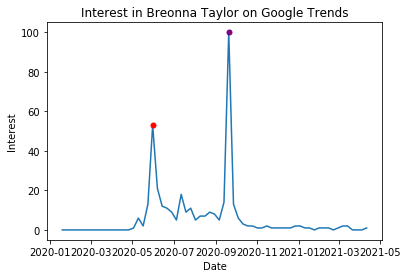

In [7]:

# Now add some items to the cases dataframe
cases["approx_court_date"] = ["NaN"]*len(cases)
cases["court_peak"] = ["NaN"]*len(cases)
cases["court_peak_size"] = ["NaN"]*len(cases)
cases["first_peak_date"] = ["NaN"]*len(cases)
cases["first_peak_size"] = ["NaN"]*len(cases)
# cases["second_peak_date"] = ["NaN"]*len(cases)
# cases["second_peak_size"] = ["NaN"]*len(cases)


cases_list = []
for ind in cases.index:
    new_case = ShootingCase(cases["name"][ind], cases["date-start"][ind])
    cases["approx_court_date"][ind] = pd.Timestamp(new_case.get_court_date_week())
    cases["court_peak"][ind] = pd.Timestamp(new_case.get_court_peak())
    cases["court_peak_size"][ind] = new_case.get_court_peak_size()
    cases["first_peak_date"][ind] = pd.Timestamp(new_case.get_filtered_peaks()[0][0])
    cases["first_peak_size"][ind] = new_case.get_filtered_peaks()[0][1]
#     cases["second_peak_date"][ind] = pd.Timestamp(sorted_by_size(new_case.get_filtered_peaks())[1][0])
#     cases["second_peak_size"][ind] = sorted_by_size(new_case.get_filtered_peaks())[1][1]
    cases_list.append(new_case)
cases["diff_court_date"] = cases["court_peak"] - cases["approx_court_date"]
cases["court/first"] = cases["court_peak_size"] / cases["first_peak_size"]


**Figure 1.** Plots of the Google search trends over time. The original peak is marked in red; the court date peak is shown in purple. In most cases, the court decision receives far less traffic. Exceptions to that pattern include Breonna Taylor and Eric Garner.

In [9]:

# Some tidying up
trimmed = cases[['name', 'first_peak_size', 'court_peak_size', 'court/first']].copy()
print(trimmed)
print(f"Median of ratio of first peak to court peak: {trimmed['court/first'].median()}")
print(f"Mean of ratio of first peak to court peak: {trimmed['court/first'].mean()}")
ratio_no_Garner = trimmed['court/first'][:13].append(trimmed['court/first'][14:])
print(f"Mean of ratio of first peak to court peak without Eric Garner: {ratio_no_Garner.mean()}")

                  name first_peak_size court_peak_size court/first
0         Freddie Gray             100               0           0
1           Sam Dubose             100               2        0.02
2     Philando Castile             100              56        0.56
3     Terence Crutcher             100              10         0.1
4       Alton Sterling             100               4        0.04
5          Jamar Clark             100              84        0.84
6        Jeremy McDole             100               1        0.01
7   William Chapman II              46               0           0
8         Walter Scott             100              23        0.23
9          Eric Harris             100              39        0.39
10          Tamir Rice              87             100     1.14943
11         Akai Gurley             100              75        0.75
12       Michael Brown             100              82        0.82
13         Eric Garner              13             100     7.6

**Table 3.** The peaks in the trends, alongside the ratio between those two values. After removing Eric Garner (a clear outlier), we see that the mean of the initial to court peak ratios is about 0.52

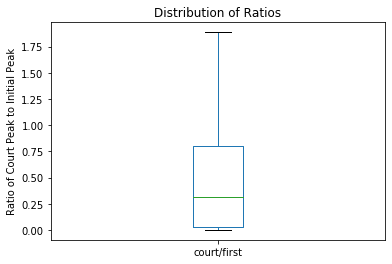

In [10]:
plt.title("Distribution of Ratios")
plt.ylabel("Ratio of Court Peak to Initial Peak")
box = ratio_no_Garner.plot.box()

**Figure 2.** A box-and-whisker plot of the peak ratios. The plot is skewed upward, meaning that there are more points below the median than above it.

The trend data for every case was erratic, showing multiple peaks and fluctutations as time went on. In most cases, the first peak was the highest. This traffic spike represents the point at which the general public first becomes aware of the case. After this original spike, the search frequency declines steeply over the next couple of weeks. Generally speaking, every case has at least three distinct peaks. A few cases, such as Tamir Rice, have even more. Nearly every graph has a peak in May 2020, corresponding with the surge in racial justice movements following George Floyd's death.

Every case experienced a peak that corresponded to its legal resolution. On average, these "court peaks" were 52% as large as the initial peaks. For William Chapman II, Tamir Rice, Eric Garner, and Breonna Taylor, however, the court peaks were higher. This could be explained in a few ways. Mainstream news organizations and social media channels may have failed to sufficiently amplify the story at the outset. New information may have come to light during the legal proceedings that wasn't originally available. The least likely explanation is that the public waited until the court decision to formulate its response. This is improbable judging by the trends we've observed in the rest of the data.


## Conclusion
Google search data suggests that public isn't fully interested in the legal resolution of police incidents. In general, most people seem to make up their mind about a controversy when they first learn of it. Public interest in a police incident is front-heavy. Many people seem to lose interest in these incidents after the first few weeks. The climactic legal decision regarding a case can only partially reignite public interest. Social media may be partly to blame for this. Modern media platforms tend to promote shorter, inflammatory content. An outrageous video of a police shooting will garner far more clicks and re-shares than a prosaic legal statement. Furthermore, many individuals may eagerly watch a two-minute video clip but balk at the idea of actively following the forthcoming, months-long legal process. Activist leaders will need to think of strategies for keeping the public engaged until a legal resolution is reached. If more emphasis is placed on the legal process, the strengths and weaknesses of the current justice system may become more apparent. 

## Works Cited
1. Monica Anderson, Michael Barthel, Andrew Perrin, and Emily A. Vogels. #blacklivesmatter surges on twitter after george floyd’s death. Pew Research Center, Jun 2020. https://www.pewresearch.org/fact-tank/2020/06/10/blacklivesmatter-surges-on-twitter-after-george-floyds-death/.

2. Giorgi, Salvatore & Guntuku, Sharath Chandra & Rahman, Muhammad & Himelein-Wachowiak, McKenzie & Kwarteng, Amy & Curtis, Brenda. (2020). Twitter Corpus of the #BlackLivesMatter Movement And Counter Protests: 2013 to 2020. 

3. Good Morning America. “2020's Google Trends Will Restore Your Faith in Humanity.” Good Morning America, www.goodmorningamerica.com/living/story/2020-google-trends-reveal-people-care-74758663. 

4. Lopez, German. “Cops Are Almost Never Prosecuted and Convicted for Use of Force.” Vox, Vox, 13 Aug. 2016, www.vox.com/identities/2016/8/13/17938234/police-shootings-killings-prosecutions-court. 